<a href="https://colab.research.google.com/github/Satwikram/NLP-Implementations/blob/main/Feature%20Engineering%20for%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

In [1]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


### Downloading the dataset

In [2]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 36.3MB/s]


In [3]:
!unzip /content/sms-spam-collection-dataset.zip

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


### Importing Dependencies

In [4]:
import pandas as pd
import numpy as np
import re
import string

### Loading Dataset

In [8]:
dataset = pd.read_csv("/content/spam.csv", encoding="latin-1", usecols=["v1", "v2"])

In [9]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
dataset.columns = ["target", "text"]

In [13]:
dataset["target"].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [14]:
dataset.shape

(5572, 2)

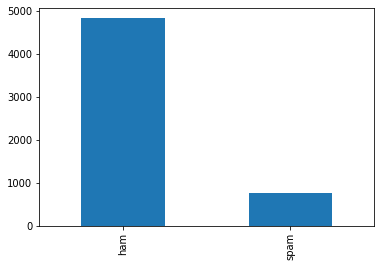

In [15]:
dataset["target"].value_counts().plot(kind = "bar");

### Feature Engineering

#### Removing Extra spaces before doing feature engineering

In [16]:
dataset["Cleaned"] = dataset["text"].apply(lambda x: re.sub("\s+", " ", x))

In [17]:
dataset["Cleaned"][100], dataset["text"][100]

('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx',
 'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

#### Calculating text length

In [18]:
len(dataset["Cleaned"][0]) - dataset["Cleaned"][0].count(" ")

92

In [19]:
dataset["length"] = dataset["Cleaned"].apply(lambda x: len(x) - x.count(" "))

In [20]:
dataset["length"]

0        92
1        24
2       128
3        39
4        49
       ... 
5567    132
5568     30
5569     48
5570    100
5571     21
Name: length, Length: 5572, dtype: int64

#### Number of Words in text

In [21]:
dataset["Cleaned"][0].split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [22]:
dataset["Number of words"] = dataset["Cleaned"].apply(lambda x: len(x.split()))

In [23]:
dataset["Number of words"]

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: Number of words, Length: 5572, dtype: int64

#### % of punctuations in text

In [24]:
def count_punct(text):

  count = sum([1 for char in text if char in string.punctuation])
  return round(count / (len(text) - text.count(" ")), 3) * 100

In [25]:
repr(string.punctuation)

'\'!"#$%&\\\'()*+,-./:;<=>?@[\\\\]^_`{|}~\''

In [26]:
dataset["punct%"] = dataset["Cleaned"].apply(lambda x: count_punct(x))

In [27]:
dataset.head()

,target,text,Cleaned,length,Number of words,punct%
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",92,20,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,24,6,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,39,11,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",49,13,4.1


#### Evaluate Created features

In [28]:
import matplotlib.pyplot as plt

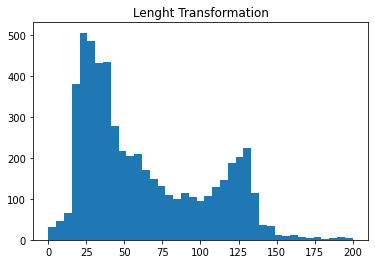

In [29]:
bins = np.linspace(0, 200, 40)
plt.hist(dataset["length"], bins)
plt.title("Lenght Transformation")
plt.show()

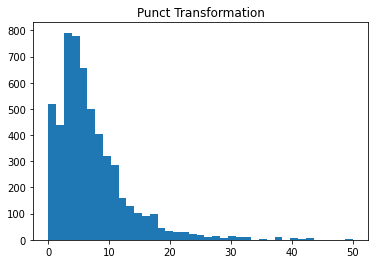

In [30]:
bins = np.linspace(0, 50, 40)
plt.hist(dataset["punct%"], bins)
plt.title("Punct Transformation")
plt.show()

#### Transformation

In [31]:
mean = dataset["punct%"].mean()
max = dataset["punct%"].max()
min = dataset["punct%"].min()
std = dataset["punct%"].std()

norm = pd.DataFrame()
diff = max - min
norm["n1"] = dataset["punct%"].apply(lambda x: (x - mean)/ std)
norm["n2"] = dataset["punct%"].apply(lambda x: (x - min)/ diff)

In [32]:
norm["l2"] = norm["n2"].apply(lambda x: np.log(x+1))

In [33]:
norm["n2"].hist?

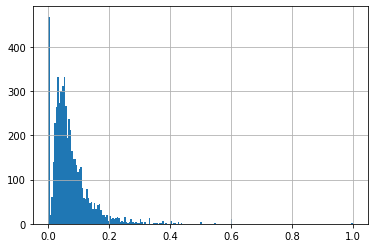

In [34]:
norm["n2"].hist(bins = 200);

#### % of Stopwords

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords

In [37]:
def count_stopwords(text):

  count = sum([1 for word in text.split() if word in stopwords.words("english")])
  return round(count / len(text.split()), 3) * 100

In [38]:
dataset["stopwords%"] = dataset["Cleaned"].apply(lambda x: count_stopwords(x))

In [39]:
dataset.head()

,target,text,Cleaned,length,Number of words,punct%,stopwords%
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",92,20,9.8,20.0
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,24,6,25.0,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,4.7,17.9
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,39,11,15.4,18.2
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",49,13,4.1,38.5


### Average length of words

In [41]:
def average_length(text):

  word = text.split()
  len_char = [len(c) for c in word]
  average = sum(len_char) / len(word)
  return average

In [42]:
dataset["Average length of words"] = dataset["Cleaned"].apply(lambda x: average_length(x))

In [43]:
dataset.head()

,target,text,Cleaned,length,Number of words,punct%,stopwords%,Average length of words
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",92,20,9.8,20.0,4.600000
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,24,6,25.0,0.0,4.000000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,4.7,17.9,4.571429
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,39,11,15.4,18.2,3.545455
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",49,13,4.1,38.5,3.769231


#### Readability score

In [44]:
!pip install textstat

     |████████████████████████████████| 101 kB 7.5 MB/s 
     |████████████████████████████████| 2.0 MB 52.2 MB/s 


In [45]:
import textstat

In [46]:
dataset["Cleaned"][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [47]:
test_data = ["""The Parties shall complete an ITIL 2011 compliant policy and procedures manual (the “Policy and Procedures Manual”) as a deliverable during the transition and shall mutually update the Policy and Procedures Manual on  an annual basis.  A ITIL 2011 compliant table of contents for the Policy and Procedures Manual is attached to this Agreement as Exhibit 22 (Policy and Procedures Manual (Table of Contents)).  As processes and procedures change, IBM shall prepare and provide to ABCR, for ABCR’s approval, updates to the Policy and Procedures Manual to reflect any changes in the operations processes or procedures described therein as soon as practicable after such changes are made.""",
             """At least once every Contract Year, or on request after notice from ABCR, IBM shall meet with representatives of ABCR in order to (i) explain how the Systems work and should be operated, (ii) explain how the Services are provided, (iii) provide such training and documentation as ABCR may require for ABCR to understand and operate the Systems and understand and provide the Services after the End Date, and (iv) update the applicable ITSM/ITIL standards and IBM best practices set forth in the Statement of Work.""",
             """Reference: CD-3
Name: 2.3 Service Management & Governance Manual
Description: Provider will Deliver The Service Management & Governance Manual in stages To Customer.
The purpose and scope of The Service Management & Governance Manual is To Document The policies and procedures and operational information That pertain To The Services and other functions and aspects of Provider's performance, including:
■ Organizational Overview
 """]

In [48]:
res = {}

In [49]:
for idx, text in enumerate(test_data):
  res.setdefault(idx, []).append(textstat.automated_readability_index(text))
  res.setdefault(idx, []).append(textstat.gunning_fog(text))
  res.setdefault(idx, []).append(textstat.flesch_reading_ease(text))

In [50]:
res

{0: [57.4, 47.29, -54.06], 1: [45.1, 37.19, -7.36], 2: [23.4, 20.57, 16.66]}

In [52]:
dataset["readability score"] = dataset["Cleaned"].apply(lambda x: textstat.automated_readability_index(x))

In [53]:
dataset["gunning_fog score"] = dataset["Cleaned"].apply(lambda x: textstat.gunning_fog(x))

In [54]:
dataset["flesch_reading_ease"] = dataset["Cleaned"].apply(lambda x: textstat.flesch_reading_ease(x))

In [55]:
dataset["smog_index score"] = dataset["Cleaned"].apply(lambda x: textstat.smog_index(x))

In [56]:
dataset.describe()

,length,Number of words,punct%,stopwords%,Average length of words,readability score,gunning_fog score,flesch_reading_ease,smog_index score
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,65.511665,15.494436,7.202692,27.814968,4.286871,3.816744,4.929149,89.365262,0.948833
std,48.629385,11.329427,6.701062,15.575176,1.151208,6.290295,3.458477,22.231115,2.259513
min,2.000000,1.000000,0.000000,0.000000,1.500000,-13.500000,0.000000,-555.590000,0.000000
25%,29.000000,7.000000,3.300000,16.700000,3.666667,0.200000,2.400000,79.600000,0.000000
50%,50.000000,12.000000,5.600000,28.600000,4.125000,2.900000,3.720000,91.170000,0.000000
75%,98.000000,23.000000,9.200000,39.325000,4.700000,6.500000,6.520000,102.610000,0.000000
max,740.000000,171.000000,100.000000,77.800000,49.000000,209.900000,68.870000,206.840000,12.500000


#### Count Vowels

In [57]:
def count_vowels(text):

  count = sum([1 for char in text if char in ["a", "e", "i", "o", "u"]])
  return round(count / (len(text) - text.count(" ")), 3) * 100

In [58]:
dataset["vowel%"] = dataset["Cleaned"].apply(lambda x: count_vowels(x))

#### Count Articles

In [62]:
def count_articles(text):

  count = sum([1 for word in text.split() if word in ["a", "the", "an"]])
  return round(count / (len(text.split())), 3) * 100

In [63]:
dataset["article%"] = dataset["Cleaned"].apply(lambda x: count_articles(x))

In [64]:
dataset.describe()

,length,Number of words,punct%,stopwords%,Average length of words,readability score,gunning_fog score,flesch_reading_ease,smog_index score,vowel%,article%
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,65.511665,15.494436,7.202692,27.814968,4.286871,3.816744,4.929149,89.365262,0.948833,31.642175,2.666045
std,48.629385,11.329427,6.701062,15.575176,1.151208,6.290295,3.458477,22.231115,2.259513,7.910799,4.644400
min,2.000000,1.000000,0.000000,0.000000,1.500000,-13.500000,0.000000,-555.590000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,3.300000,16.700000,3.666667,0.200000,2.400000,79.600000,0.000000,28.600000,0.000000
50%,50.000000,12.000000,5.600000,28.600000,4.125000,2.900000,3.720000,91.170000,0.000000,33.100000,0.000000
75%,98.000000,23.000000,9.200000,39.325000,4.700000,6.500000,6.520000,102.610000,0.000000,36.500000,4.200000
max,740.000000,171.000000,100.000000,77.800000,49.000000,209.900000,68.870000,206.840000,12.500000,54.500000,33.300000
